## End to end Multitask Dog Breed Identification

## 1.Problem 
Identifying the breed of a dog given the picture.

## 2.Data
The data is from kaggle's dog breed identification competition: https://www.kaggle.com/c/dog-breed-identification

## 3.Evaluation 
Submissions are evaluated on Multi Class Log Loss between the predicted probability and the observed target.

## 4.Features
* We are dealing with images so it's probably best we use deep learning/transfer learning
* There are a 120 breeds of dogs
* Test data has more than 10000+
* Training data has more than 10000+ 


# Get our workspace ready
* Import tensorflow 2.x
* Import tensorflow hub
* Make sure we are using a GPU

In [2]:
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

TF version: 2.10.1
Hub version: 0.12.0


In [4]:
import pandas as pd

In [5]:
labels_csv = pd.read_csv('labels.csv')
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [6]:
print(labels_csv.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<AxesSubplot:>

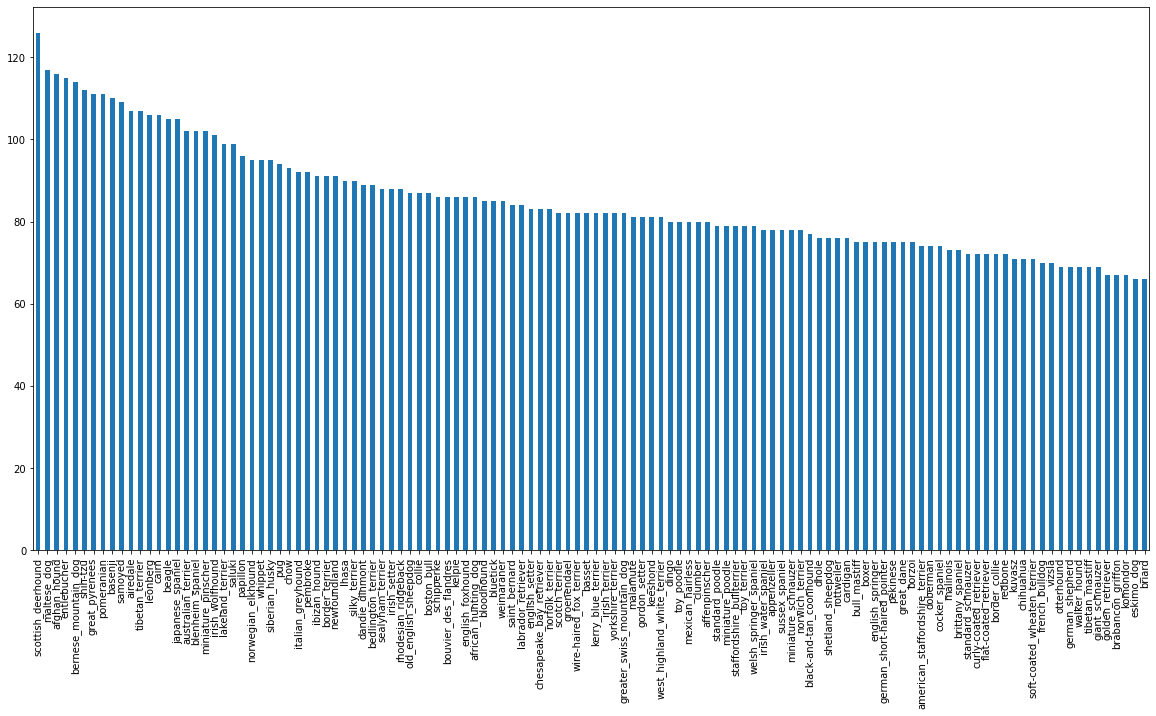

In [7]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [8]:
from IPython.display import display, Image

In [9]:
filenames = ['train/' + fname + ".jpg" for fname in labels_csv['id']]
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
import os

In [11]:
if len(os.listdir('train/')) == len(filenames):
    print('Filenames match actual amount of files!')
else: 
    print('Filenames doesnt match actual amount of files, check directory')

Filenames match actual amount of files!


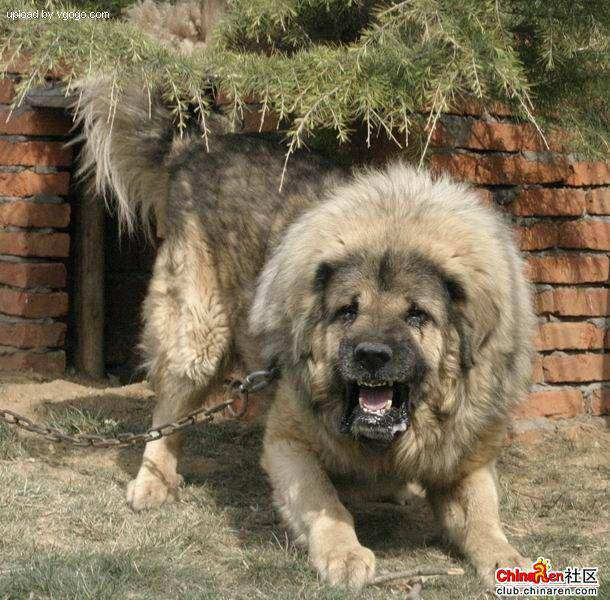

In [12]:
# Check an image directly from a filepath
Image(filenames[9000])

In [13]:
import numpy as np


In [14]:
labels = labels_csv['breed'].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [15]:
# See if number of labels matches number of filenames
if len(labels) == len(filenames):
    print('Number of labels matches number of filenames')
else:
    print('Number of labels doe not match number of filenames')

Number of labels matches number of filenames


In [16]:
# Find unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [17]:
len(unique_breeds)

120

In [18]:
# Turn a single label into an array of booleans
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [19]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [20]:
len(boolean_labels)

10222

In [21]:
# Turning boolean array into integers
print(labels[0]) # Original label
print(np.where(unique_breeds == labels[0])) # Index where label occurs
print(boolean_labels[0].argmax()) # Index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #There will be a 1 where sample label occurs


boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set
Since the data from kaggle doesn't come with a validation set we have to create one

In [22]:
# Setup X & y
X = filenames
y = boolean_labels

We are going to start of with a 1000 images and increase it gradually 

In [23]:
# Set number of images to use for experimenting
# NUM_IMAGES = 5000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [24]:
import ipywidgets as widgets

In [25]:
slider = widgets.IntSlider(
 value=1000, # default value
 min=1000, # min value
 max=10000, # max value
 step=1000,# increment size
 disabled=False,
 description='NUM_IMAGES' # slider label
)
display(slider) # display the slider

IntSlider(value=1000, description='NUM_IMAGES', max=10000, min=1000, step=1000)

In [26]:
slider.value

1000

In [27]:
# Lets split our data into training and validation sets
from sklearn.model_selection import train_test_split

np.random.seed(42)
# Split into training and validation set of total size = NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:slider.value],
                                                  y[:slider.value],
                                                  test_size=0.2)

In [28]:
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [29]:
X_train[:5], y_train[:5]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fa

### Preprocessing images (turning images into Tensors)
To proprocess our image we are going to write a function which does the following:
1. Take our `image` filepath as input.
2. Use Tensorflow to read the file and save it to a variable, `image`.
3. Turn our `image`(a jpeg) into Tensors.
4. Normalize our image (convert our colour channels from 0-225 to 0-1)
5. Resize the `image` to be of shape (224, 224).
6. Return the modified `image`.

### Before we do that let's see what importing an image looks like

In [30]:
from matplotlib.pyplot import imread

In [31]:
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [32]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [33]:
# Create a Tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [34]:
# Define image size 
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, image_size=IMG_SIZE):
    """
    Takes an image filepath and turns the image into Tensors
    """
    # Read in an image file
    image = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green & Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the colour channel values from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to our desired value
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    
    return image

### Turning Data into Batches

Why turn our data into batches?

Let's say you are trying to process 10,000+ images in one go ... they all might not fit into memory.

That's why we do about 32 images (that's the batch size) at a time.

In order to use Tensorflow effectively we need our data to be in the form of Tensor tuples i.e. `(image, label)`

In [35]:
# Create a simple function to return a Tuple (image, label)
def get_image_label(image_path, label):
    """
    Take an image filepath and it's associated label processes it and returns a Tuple of (image, label)
    """
    image = process_image(image_path)
    return image, label


In [36]:
# Demo of the above 
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now let's turn all of our data(X & y) into batches

In [37]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [38]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)


Creating training data batches...
Creating validation data batches...


In [39]:
# Check out the different attributes of our data batches
train_data.element_spec, train_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualizing data batches
Our data is now in batches but we need to visualize them to improve understanding

In [40]:
import matplotlib.pyplot as plt

In [41]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from their data batch.
    """
    # Setup the figure
    plt.figure(figsize=(10, 10))
    
    # Loop through 25 (displaying 25 images)
    for i in range(25):
        # Creates subplots (5 rows, 5 columns)
        plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn the gridlines off
        plt.axis('off')

In [42]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [43]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

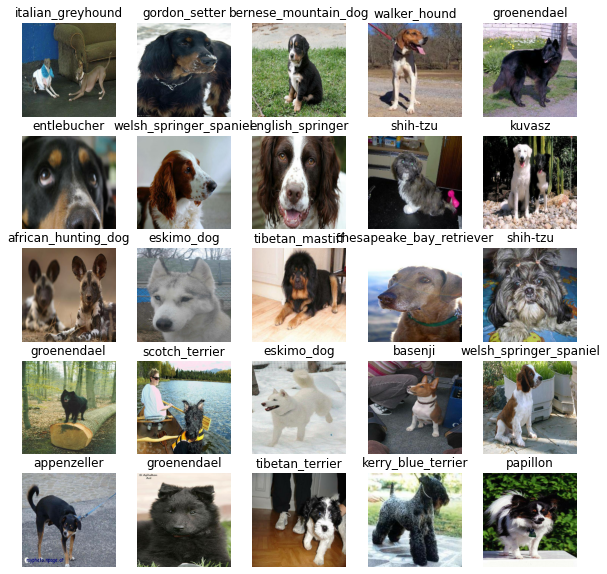

In [44]:
# Now lets visualize the data in training batch
show_25_images(train_images, train_labels)

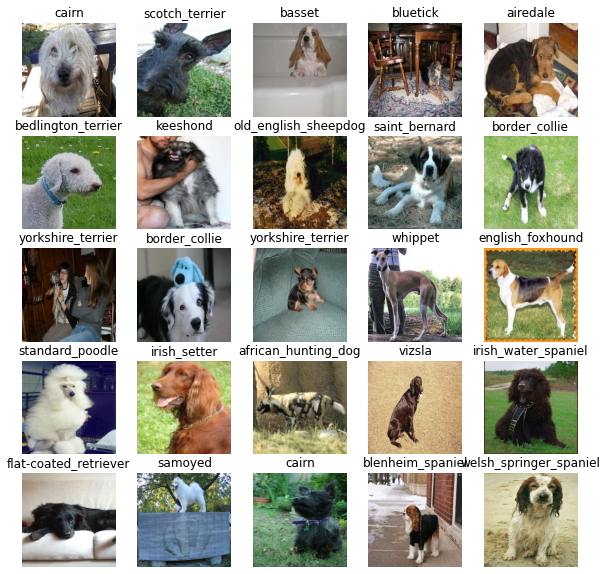

In [45]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
Before building our model there are a few things we need to define:
* The input shape (our images shape in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from Tensorflow Hub https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5.

In [46]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width and colour channels

# Setup output shape to the model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5"

Now we have got our input, output and output ready we can now setup a Keras Deep Learning model.
Knowing this let's crewate a function which:
* Takes the input shape, output shape and model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion.
* Compile the model (says how it should be evaluated and improved).
* Builds the model (tells the model the input shape it will be getting).
* Returns the model.
All of these steps can be found here: https://www.tensorflow.org/guide/keras/sequential_model

In [47]:
# Create a function which builds a keras model.
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Buiding model with", MODEL_URL)
    
    # Setup the model layers
    model = tf.keras.Sequential([
                                hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
                                tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                      activation="softmax") # Layer 2 (output layer)
    ])
    
    # Compile the model
    model.compile(
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"]
    )
    
    # Build the model
    model.build(INPUT_SHAPE)
    
    return model

In [48]:
model = create_model()
model.summary()

Buiding model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1664)              3766048   
                                                                 
 dense (Dense)               (None, 120)               199800    
                                                                 
Total params: 3,965,848
Trainable params: 199,800
Non-trainable params: 3,766,048
_________________________________________________________________


## Creating callbacks
Callbavks are helper functions a model can use during training to do such things as save it's progress, check it's progress and stop training early if the model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:

* Load the TensorBoard notebook extension ✅
* Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function. ✅
* Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [49]:
# Load Tensorboard notebook extension
%reload_ext tensorboard

In [50]:
import datetime, os

In [51]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("dog-breed-identification/Logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callbacks
Stops our model from overfitting if a certain evaluation metric sttops improving

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [52]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training a model (on a subset of data)
Our first model is only going to train on 1000 images, to make sure everything is working.


In [53]:
import ipywidgets as widgets
slider = widgets.IntSlider(
 value=100, # default value
 min=10, # min value
 max=100, # max value
 step=10,# increment size
 disabled=False,
 description='NUM_EPOCHS' # slider label
)
display(slider) # display the slider

IntSlider(value=100, description='NUM_EPOCHS', min=10, step=10)

In [54]:
NUM_EPOCHS = 100

In [55]:
# Check to make sure you are still running on GPU
print("GPU", "available (YES!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU not available :(


Let's create a function which trains a model.

* Create a model using create_model()
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
* Return the model

In [56]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [57]:
# Fit the model
model = train_model()

Buiding model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5
Epoch 1/100
25/25 [==============================] - 30s 912ms/step - loss: 4.2994 - accuracy: 0.1375 - val_loss: 3.3014 - val_accuracy: 0.3100
Epoch 2/100
25/25 [==============================] - 23s 905ms/step - loss: 1.4584 - accuracy: 0.7800 - val_loss: 1.9446 - val_accuracy: 0.5450
Epoch 3/100
25/25 [==============================] - 24s 952ms/step - loss: 0.5252 - accuracy: 0.9663 - val_loss: 1.5182 - val_accuracy: 0.6250
Epoch 4/100
25/25 [==============================] - 24s 947ms/step - loss: 0.2648 - accuracy: 0.9925 - val_loss: 1.3810 - val_accuracy: 0.6550
Epoch 5/100
25/25 [==============================] - 24s 982ms/step - loss: 0.1672 - accuracy: 0.9987 - val_loss: 1.3025 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 24s 971ms/step - loss: 0.1186 - accuracy: 1.0000 - val_loss: 1.2510 - val_accuracy: 0.6750
Epoch 7/100
25/25 [==========================

### Checking the Tensorboard logs
The Tensorboard magic function (%tensorboard) will access the logs directory we created earlier and visualize it's contents

In [58]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 10148), started 5 days, 2:11:13 ago. (Use '!kill 10148' to kill it.)

## Making nad Evaluating predictions using a trained model

In [59]:
# Make predictions on the validation data (not used during training)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 5s 660ms/step


array([[4.69989405e-04, 4.39750496e-04, 3.12441232e-04, ...,
        4.63356628e-05, 3.08337512e-05, 3.72893177e-03],
       [4.52878280e-03, 3.05929244e-03, 1.91460885e-02, ...,
        2.25252807e-04, 5.14687179e-03, 3.46420682e-04],
       [1.14878545e-04, 6.29013521e-04, 2.48609256e-04, ...,
        3.24957742e-04, 1.27180305e-04, 5.16736356e-04],
       ...,
       [2.50374269e-05, 2.65596522e-04, 2.13949155e-04, ...,
        2.82016590e-05, 1.45995989e-04, 7.54767039e-04],
       [4.65644989e-03, 4.15575138e-04, 3.05716472e-04, ...,
        1.39032214e-04, 1.10777139e-04, 9.69978981e-03],
       [2.65918003e-04, 1.99452188e-05, 2.33380124e-03, ...,
        2.22740672e-03, 8.43067945e-04, 2.57480337e-04]], dtype=float32)

In [60]:
predictions.shape

(200, 120)

In [61]:
predictions[0]

array([4.6998941e-04, 4.3975050e-04, 3.1244123e-04, 8.0780774e-05,
       3.6468072e-04, 8.4224928e-05, 2.1999067e-02, 1.7390770e-04,
       1.0305292e-04, 4.9278332e-04, 3.3233435e-05, 1.0870957e-04,
       9.8962364e-06, 2.7821941e-05, 2.2196746e-04, 5.4087424e-05,
       3.5060232e-06, 2.1613014e-01, 4.3662885e-06, 7.4544463e-05,
       5.1569968e-04, 1.0980194e-04, 6.0167360e-05, 5.5191905e-04,
       2.1239803e-05, 1.3385968e-05, 4.4438270e-01, 3.3779455e-05,
       4.2270395e-04, 3.7154730e-04, 5.7394249e-05, 3.6231859e-04,
       1.3239968e-04, 6.0085390e-06, 6.7041568e-05, 3.8821533e-02,
       8.9759029e-05, 7.2373383e-05, 1.5552581e-05, 3.1257190e-05,
       1.1610066e-04, 2.3578128e-05, 1.6553695e-05, 1.3822690e-05,
       3.8136892e-05, 9.4118521e-05, 6.6036405e-06, 2.6746417e-04,
       6.4310392e-05, 9.5308642e-05, 3.6872003e-05, 2.5363541e-05,
       8.6683192e-04, 2.9435805e-05, 6.6166958e-06, 2.3215362e-06,
       1.0328418e-05, 3.0798402e-03, 1.1075931e-04, 4.1906931e

In [62]:
np.sum(predictions[0])

1.0

In [63]:
# First prediction
index = 0
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum : {np.sum(predictions[index])}")
print(f"Max index : {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[4.6998941e-04 4.3975050e-04 3.1244123e-04 8.0780774e-05 3.6468072e-04
 8.4224928e-05 2.1999067e-02 1.7390770e-04 1.0305292e-04 4.9278332e-04
 3.3233435e-05 1.0870957e-04 9.8962364e-06 2.7821941e-05 2.2196746e-04
 5.4087424e-05 3.5060232e-06 2.1613014e-01 4.3662885e-06 7.4544463e-05
 5.1569968e-04 1.0980194e-04 6.0167360e-05 5.5191905e-04 2.1239803e-05
 1.3385968e-05 4.4438270e-01 3.3779455e-05 4.2270395e-04 3.7154730e-04
 5.7394249e-05 3.6231859e-04 1.3239968e-04 6.0085390e-06 6.7041568e-05
 3.8821533e-02 8.9759029e-05 7.2373383e-05 1.5552581e-05 3.1257190e-05
 1.1610066e-04 2.3578128e-05 1.6553695e-05 1.3822690e-05 3.8136892e-05
 9.4118521e-05 6.6036405e-06 2.6746417e-04 6.4310392e-05 9.5308642e-05
 3.6872003e-05 2.5363541e-05 8.6683192e-04 2.9435805e-05 6.6166958e-06
 2.3215362e-06 1.0328418e-05 3.0798402e-03 1.1075931e-04 4.1906931e-02
 3.2388917e-04 7.5198545e-06 4.5535213e-04 5.9297625e-05 1.2735353e-04
 1.0184149e-03 7.5932054e-05 4.4113389e-05 8.1704492e-03 1.2973760e-04
 2.103

Having the the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

Note: Prediction probabilities are also known as confidence levels.

In [64]:
# Turn prediction probabilities into their respective labels
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """
    return unique_breeds[np.argmax(prediction_probabilities)]

In [65]:
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

In [66]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [67]:
# Create a function to unbatch a batched dataset


In [68]:

images_ = []
labels_ = []

# Loop through unbatched dataset
for images, labels in val_data.unbatch().as_numpy_iterator():
    images_.append(images)
    labels_.append(labels)
    
images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [69]:
def unbatchify(data):
    """
    Takes a batched dataset of (images, labels) Tensors and returns an seperate images, labels arrays 
    """
    images = []
    labels = []
    
    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

In [70]:
# Unbatchify validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [71]:
get_pred_label(val_images[0])

'vizsla'

Now we've got ways to get get:

* Prediction labels
* Validation labels (truth labels)
* Validation images
Let's make some function to make these all a bit more visaulize.

We'll create a function which:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [72]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction, ground truth and image for sample n
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    
    # Get the pred label
    pred_label = get_pred_label(pred_prob)
    
    # Plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    # Change the colour of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    # Change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)
    
    

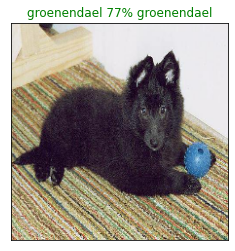

In [73]:
plot_pred(prediction_probabilities=predictions,
           labels=val_labels,
           images=val_images,
           n=77)
            

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:

* Take an input of prediction probabilities array and a ground truth array and an integer ✅
* Find the prediction using get_pred_label() ✅
* Find the top 10:
   * Prediction probabilities indexes ✅
   * Prediction probabilities values ✅
   * Prediction labels ✅
* Plot the top 10 prediction probability values and labels, coloring the true label green ✅

In [74]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plot the top 10 probability labels along with the truth label for sample n
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]
    
    # Get the predicted label
    pred_label = get_pred_label(pred_prob)
    
    # Find the top ten prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    
    # Find the top 10 confidence prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    
    # Find the top 10 confidence prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    
    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

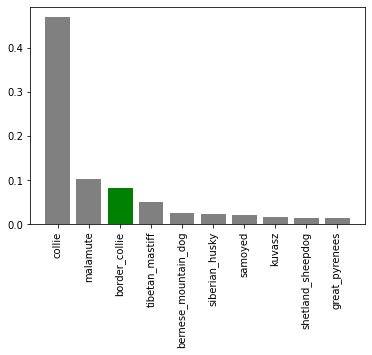

In [75]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some function to help us visualize our predictions and evaluate our modle, let's check out a few.

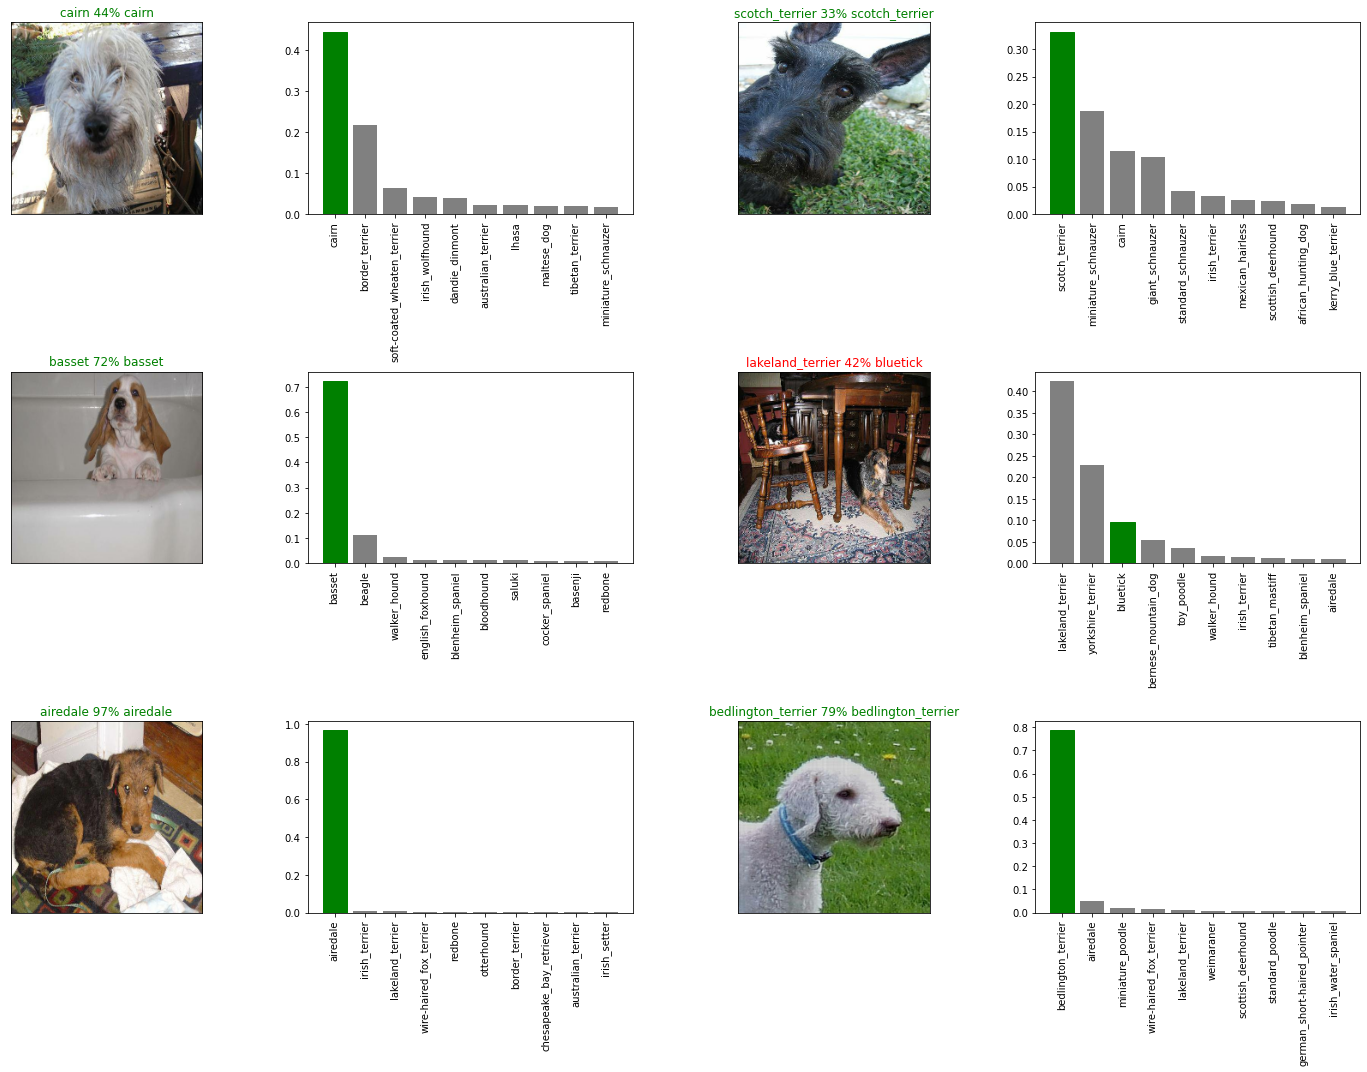

In [76]:
# Let's check out a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
              labels=val_labels,
              n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

How would you dreate a confusion matrix with our model

## Saving and reloading a trained model

In [77]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [78]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got a function to load and save a model, let's make sure they work

In [79]:
import  datetime

In [80]:
# Save our model trained on 1000 images
save_model(model, suffix="1000_images_mobilenetv2_Adam")

Saving model to: models\20230126-121015-1000_images_mobilenetv2_Adam.h5...


'models\\20230126-121015-1000_images_mobilenetv2_Adam.h5'

In [81]:
# Load a trained model
load_1000_image_model = load_model("models/20230124-134704-1000_images_mobilenetv2_Adam.h5")

Loading saved model from: models/20230124-134704-1000_images_mobilenetv2_Adam.h5


In [82]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 5s 643ms/step - loss: 1.1813 - accuracy: 0.6650


[1.1812782287597656, 0.6650000214576721]

In [83]:
# Evaluate the loaded model
load_1000_image_model.evaluate(val_data)

7/7 [==============================] - 5s 667ms/step - loss: 1.0633 - accuracy: 0.7200


[1.0633255243301392, 0.7200000286102295]

## Training a big dog model

In [84]:
len(X), len(y)

(10222, 10222)

In [85]:
X[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [86]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [87]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [88]:
# Create a model for full model
full_model = create_model()

Buiding model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5


In [89]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

In [90]:
# No validation set when training on all the data so we don't monitor the validation set
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

**Note** The model below will take a while

In [91]:
%%time
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 266s 803ms/step - loss: 1.2691 - accuracy: 0.6852
Epoch 2/100
320/320 [==============================] - 261s 814ms/step - loss: 0.3821 - accuracy: 0.8891
Epoch 3/100
320/320 [==============================] - 261s 815ms/step - loss: 0.2240 - accuracy: 0.9455
Epoch 4/100
320/320 [==============================] - 262s 818ms/step - loss: 0.1429 - accuracy: 0.9728
Epoch 5/100
320/320 [==============================] - 263s 819ms/step - loss: 0.0970 - accuracy: 0.9838
Epoch 6/100
320/320 [==============================] - 261s 814ms/step - loss: 0.0698 - accuracy: 0.9928
Epoch 7/100
320/320 [==============================] - 263s 821ms/step - loss: 0.0524 - accuracy: 0.9956
Epoch 8/100
320/320 [==============================] - 263s 821ms/step - loss: 0.0400 - accuracy: 0.9978
Epoch 9/100
320/320 [==============================] - 263s 822ms/step - loss: 0.0322 - accuracy: 0.9983
Epoch 10/100
320/320 [==============================] -

In [92]:
# Save model
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: models\20230126-132509-full-image-set-mobilenetv2-Adam.h5...


'models\\20230126-132509-full-image-set-mobilenetv2-Adam.h5'

In [93]:
# Load in the full model
loaded_full_model = load_model("models/20230124-225251-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: models/20230124-225251-full-image-set-mobilenetv2-Adam.h5


### Making predictions on the test dataset
Since our data has been trained on images in the form of Tensors same goes for the test dataset.
* Luckily we have `create_data_batches` function

To make predictions on the test data we will:
* Get the test data filenames. ✔
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test data` parameter to True (since the test data doesn't have labels).
* make a predictions array by passing the test batches to the `predict()` method called on our model.

In [94]:
# Load test image filenames
test_path = "test/"
test_file_names = [test_path + fname for fname in os.listdir(test_path)]

In [95]:
test_file_names[:10]

['test/000621fb3cbb32d8935728e48679680e.jpg',
 'test/00102ee9d8eb90812350685311fe5890.jpg',
 'test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'test/002f80396f1e3db687c5932d7978b196.jpg',
 'test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [96]:
len(test_file_names)

10357

In [97]:
test_data = create_data_batches(test_file_names, test_data=True)

Creating test data batches...


In [98]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note** The model below will take long time to run

In [99]:
# Make predictions on test data using loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 268s 825ms/step


In [100]:
# Save predictions (numpy array) to a csv file
np.savetxt("preds_array.csv", test_predictions, delimiter=",")

In [101]:
# Load predictions (numpy array) from saved file
test_predictions = np.loadtxt("preds_array.csv", delimiter=",")

In [102]:
test_predictions[:10]

array([[1.72872028e-08, 4.72475170e-09, 2.38381426e-10, ...,
        5.30183586e-09, 3.04482639e-09, 1.87578797e-09],
       [5.61062564e-07, 5.56015664e-07, 5.69886140e-07, ...,
        5.02489295e-09, 9.52235801e-09, 1.06061133e-08],
       [1.43281731e-09, 3.03451870e-05, 2.14761570e-07, ...,
        1.41502442e-05, 3.88074195e-09, 3.30797234e-09],
       ...,
       [1.03551603e-08, 2.58616217e-09, 7.58889840e-09, ...,
        6.78624712e-10, 8.32818606e-11, 1.03600550e-09],
       [3.49257090e-09, 3.03301277e-07, 8.85251765e-08, ...,
        2.51831261e-05, 2.53845951e-06, 6.59356181e-10],
       [2.09329336e-08, 1.73157488e-09, 1.58759583e-08, ...,
        8.34744843e-11, 7.93704408e-11, 2.39060149e-09]])

In [103]:
test_predictions.shape

(10357, 120)

In [104]:
test_predictions[:10]

array([[1.72872028e-08, 4.72475170e-09, 2.38381426e-10, ...,
        5.30183586e-09, 3.04482639e-09, 1.87578797e-09],
       [5.61062564e-07, 5.56015664e-07, 5.69886140e-07, ...,
        5.02489295e-09, 9.52235801e-09, 1.06061133e-08],
       [1.43281731e-09, 3.03451870e-05, 2.14761570e-07, ...,
        1.41502442e-05, 3.88074195e-09, 3.30797234e-09],
       ...,
       [1.03551603e-08, 2.58616217e-09, 7.58889840e-09, ...,
        6.78624712e-10, 8.32818606e-11, 1.03600550e-09],
       [3.49257090e-09, 3.03301277e-07, 8.85251765e-08, ...,
        2.51831261e-05, 2.53845951e-06, 6.59356181e-10],
       [2.09329336e-08, 1.73157488e-09, 1.58759583e-08, ...,
        8.34744843e-11, 7.93704408e-11, 2.39060149e-09]])

## Preparing test dataset predictions for kaggle
Looking at the Kaggle sample submission, we find that it wants our models prediction probaiblity outputs in a DataFrame with an ID and a column for each different dog breed. https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:

* Create a pandas DataFrame with an ID column as well as a column for each dog breed. ✅
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilites) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [105]:
# Create a pndas dataframe with empty columns
preds_df = pd.DataFrame(columns=['id'] + list(unique_breeds))

In [106]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [111]:
# Append test image ids to the empty dataframe
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids


In [112]:
preds_df.head(10)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00102ee9d8eb90812350685311fe5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0012a730dfa437f5f3613fb75efcd4ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001510bc8570bbeee98c8d80c8a95ec1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001a5f3114548acdefa3d4da05474c2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,00225dcd3e4d2410dd53239f95c0352f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,002c2a3117c2193b4d26400ce431eebd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,002c58d413a521ae8d1a5daeb35fc803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,002f80396f1e3db687c5932d7978b196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0036c6bcec6031be9e62a257b1c3c442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,1.728720e-08,4.724752e-09,2.383814e-10,9.237540e-11,1.896339e-10,1.370046e-10,6.008652e-12,3.369538e-09,6.814795e-10,...,1.640413e-09,2.351505e-09,7.084330e-11,3.603425e-11,7.828174e-11,1.760325e-10,2.287290e-10,5.301836e-09,3.044826e-09,1.875788e-09
1,00102ee9d8eb90812350685311fe5890,5.610626e-07,5.560157e-07,5.698861e-07,5.381102e-09,1.239411e-06,2.477214e-07,1.851025e-07,2.187458e-07,4.543790e-08,...,3.404382e-06,2.416190e-06,1.391446e-08,7.664385e-07,3.116328e-07,1.202830e-08,2.958512e-04,5.024893e-09,9.522358e-09,1.060611e-08
2,0012a730dfa437f5f3613fb75efcd4ce,1.432817e-09,3.034519e-05,2.147616e-07,4.748006e-09,6.138176e-10,4.598711e-10,2.338568e-10,9.211079e-11,8.893181e-08,...,7.315746e-09,9.470091e-10,2.912071e-07,1.962096e-06,2.438707e-07,1.181473e-06,4.968505e-10,1.415024e-05,3.880742e-09,3.307972e-09
3,001510bc8570bbeee98c8d80c8a95ec1,1.189687e-03,2.778696e-06,1.257522e-05,1.122628e-07,1.174845e-06,4.614023e-08,1.295757e-10,7.048251e-08,5.490921e-08,...,5.130664e-05,2.511080e-08,1.333954e-05,2.960017e-08,7.633585e-07,3.786523e-10,2.071814e-10,9.084714e-04,3.830865e-10,1.184961e-06
4,001a5f3114548acdefa3d4da05474c2e,1.907504e-04,9.060082e-06,3.607713e-08,6.580255e-09,8.878998e-10,1.202981e-10,2.321637e-08,2.520790e-09,1.002799e-08,...,1.165877e-06,2.734596e-09,5.768029e-10,2.297017e-10,1.898872e-09,1.790838e-09,9.833031e-10,3.233076e-06,5.885006e-09,1.334749e-07


In [115]:
# Save our predictions into csv format
preds_df.to_csv("full_model_predictions_submission_1_mobilenetv2.csv", 
                index=False)

To make predictions on custom images, we'll:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.

In [131]:
# Get custom image filepaths
custom_path = "C:/Users/Boma Allwell-Brown/Machine learning/dog-breed-identification/dog_images/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [132]:
custom_image_paths

['C:/Users/Boma Allwell-Brown/Machine learning/dog-breed-identification/dog_images/German_Shepherd_-_DSC_0346_(10096362833).jpg']

In [134]:
# Turn custom images into batch dataset
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [136]:
# Make predictions on custom data
custom_preds = loaded_full_model.predict(custom_data)
custom_preds

1/1 [==============================] - 0s 56ms/step


array([[1.28729518e-11, 8.09868261e-09, 7.53526574e-09, 4.61737636e-06,
        3.99526606e-10, 1.63195135e-09, 9.83368942e-09, 2.29859953e-09,
        5.16091836e-10, 6.25366603e-09, 9.29500487e-12, 4.23204527e-10,
        5.07016296e-09, 1.13964366e-10, 1.56642542e-07, 1.71474845e-09,
        1.32212206e-08, 7.45007656e-09, 1.35446188e-08, 2.34039299e-09,
        1.00352515e-09, 2.13897389e-09, 1.77180437e-09, 4.25630065e-09,
        1.87258387e-09, 5.24911759e-09, 2.25075936e-09, 3.74453037e-07,
        7.06058656e-10, 1.64855740e-09, 1.03072297e-08, 8.84774962e-11,
        5.17619836e-10, 2.98366388e-07, 3.01959950e-11, 6.47271126e-10,
        1.45244741e-07, 5.20761068e-06, 7.98932120e-09, 8.25923330e-09,
        5.97466313e-11, 2.37604485e-11, 5.13129594e-10, 3.59763499e-06,
        2.56024135e-09, 7.90479793e-10, 9.99968171e-01, 6.76394357e-12,
        4.67142047e-10, 3.81781632e-07, 6.07724759e-09, 6.69050482e-10,
        5.28339705e-10, 2.55945132e-08, 1.78990717e-07, 1.077087

In [137]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds) for i in range(len(custom_preds))]
custom_pred_labels

['german_shepherd']

In [138]:
# Get custom image (we can't unbatchify it as it has no labels)...
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

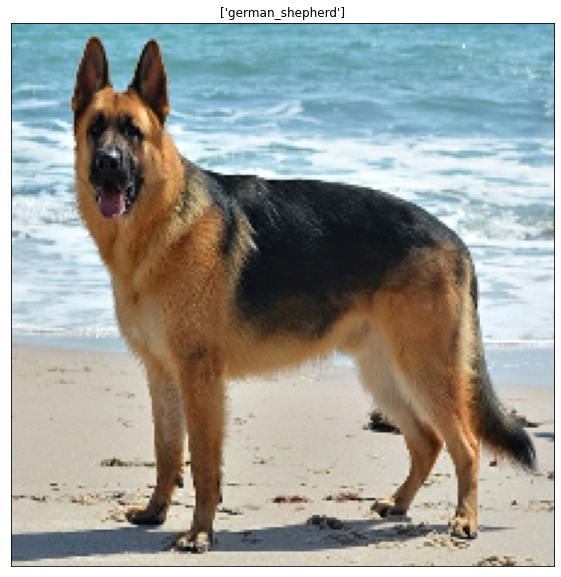

In [143]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for image in custom_images:
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels)
    plt.imshow(image)